In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import os
import glob
import cv2
import skimage
from scipy.fftpack import dct, idct
from skimage.color import rgb2gray
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Directories path
data_dir = "/content/drive/My Drive/Oranges Dataset"
train_dir = "/content/drive/MyDrive/Oranges Dataset/Train"
test_dir = "/content/drive/MyDrive/Oranges Dataset/Test"



In [ ]:
dct_data_dir = '/content/drive/My Drive/DCT'
dct_train_dir = dct_data_dir + '/Train'
dct_test_dir = dct_data_dir + '/Test'

In [ ]:
def dct2(a):
  return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
  return idct(idct(a.T, norm='ortho').T, norm='ortho')

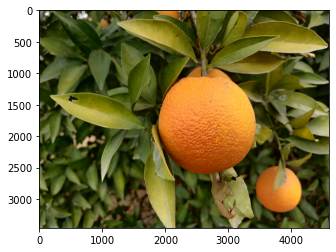

In [ ]:
img = plt.imread(train_dir + "/Mosumi/IMG_20200111_114759.jpg")
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


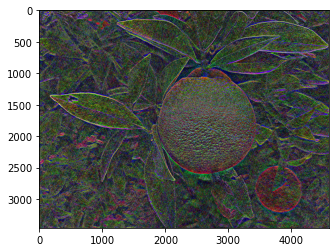

In [ ]:
dct_img = dct2(img)
noisy_dct_img = skimage.util.random_noise(dct_img, mode="gaussian", seed = 200)
idct_img = idct2(noisy_dct_img)
plt.imshow(idct_img)

In [ ]:
debug = {"state": False, "storage_limit": 10}  # Debug controller (keep 'state' False to disable)

class_list = ["Mosumi", "Keenu", "Red blood", "Shakri"]

for cl in class_list:
  counter = 0
  extraction_dir = train_dir + "/" + cl + "/"  # Change to test_dir for next run for the creation of new testing dataset
  store_dir = dct_train_dir + "/" + cl + "/"  # Change to dct_test_dir for next run  for the creation of new testing dataset

  for filename in os.listdir(extraction_dir):

    # DEBUG START

    if debug["state"] == True and counter == debug["storage_limit"]:
      break

    # DEBUG END

    image = rgb2gray(plt.imread(extraction_dir + filename))
    image_dct = dct2(image)
    image_dct = idct2(image_dct)

    # Save DCT augmented image

    plt.gray()
    plt.figure()
    fig = plt.imshow(image_dct)
    plt.axis('off')
    plt.savefig(f"{store_dir}/'{counter}.png", bbox_inches='tight')
    fig = plt.gcf()
    fig.clf()  # Clear RAM
    plt.close(fig)

    # Save original grayscale image

    plt.figure()
    fig = plt.imshow(image)
    plt.axis('off')
    plt.savefig(f"{store_dir}/'o_{counter}.png", bbox_inches='tight')
    fig = plt.gcf()
    fig.clf()  # Clear RAM
    plt.close(fig)

    counter += 1

<Figure size 432x288 with 0 Axes>

In [ ]:
transforms = transforms.Compose([
                                      transforms.Resize(size=(image_size,image_size)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                    ]) 

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader

training_data = datasets.ImageFolder(root = dct_train_dir, transform = transforms)
testing_data = datasets.ImageFolder(root = test_dir, transform = transforms)



train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=32, shuffle=True)


In [ ]:
print("Training set size: %i" % len(training_data ))
print("Test set size: %i" % len(testing_data))

Training set size: 642
Test set size: 80
